# Steps to build a Neural Network from scratch in PyTorch

<ol>1. Loading the dataset (Input and Output)</ol>
<ol>2. Architecture of the model (# input, hidden and output neurons)</ol>
<ol>3. Initializing the weights for all the layers</ol>
<ol>4. Implementing forward propagation</ol>
<ol>5. Implementing backward propagation</ol>
<ol>6. Train the model for n epochs </ol>

## 1. Loading the dataset (Input and Output)

In [1]:
# importing required libraries
import torch
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# creating the input tensor
# Input is 4 independent features having 3 observations/rows each
X = torch.tensor([[1,0,1,0], [1,0,1,1], [0,1,0,1]], dtype=torch.float)
print ('\nInput:')
print(X)
# shape of input tensor
print('\nShape of Input:', X.shape)


Input:
tensor([[1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [0., 1., 0., 1.]])

Shape of Input: torch.Size([3, 4])


In [3]:
# converting the input in matrix form
X = X.t()    # Transpose of input tensor matrix
print('\nInput in matrix form:')
print(X)
# shape of input matrix
print('\nShape of Input Matrix:', X.shape)


Input in matrix form:
tensor([[1., 1., 0.],
        [0., 0., 1.],
        [1., 1., 0.],
        [0., 1., 1.]])

Shape of Input Matrix: torch.Size([4, 3])


In [4]:
# creating the output tensor (output for each input)
y = torch.tensor([[1],[1],[0]], dtype=torch.float)
print ('\nActual Output:')
print(y)

# output in matrix form
y = y.t()

print ('\nOutput in matrix form:')
print(y)

# shape of input array
print('\nShape of Output:', y.shape)


Actual Output:
tensor([[1.],
        [1.],
        [0.]])

Output in matrix form:
tensor([[1., 1., 0.]])

Shape of Output: torch.Size([1, 3])


## 2. Architecture of the model (# input, hidden and output neurons)

In [5]:
inputlayer_neurons = X.shape[0] # number of features/ columns in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

![alt text](https://drive.google.com/uc?id=1zrEFVsc6bMQZ7fRxbK4DRceaG78k26Pc)

## 3. Initializing the weights for all the layers

NOTE: For simplicity, we are assuming that the bias for all the layers is 0

In [6]:
# initializing weights
# Shape of  weight matrix (w_ih) ie between input and hidden layer should number of (neurons at input layer) X (number of neurons at hidden layer)
w_ih=torch.randn(inputlayer_neurons,hiddenlayer_neurons)  # weight matrix bet input and hidden layer

# Shape of w_ho should number of (neurons at hidden layer) X (number of neurons at output layer)
w_ho=torch.randn(hiddenlayer_neurons,output_neurons)     #  Wt. matrix between hidden and output layer

In [7]:
# shape of weight matrix
w_ih.shape, w_ho.shape

(torch.Size([4, 3]), torch.Size([3, 1]))

## 4. Implementing forward propagation

![alt text](https://drive.google.com/uc?id=1YwD7vY9k84vZmjmE5CXgQ69fYyadPsox)

In [9]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid(s):                              # function to define activation function
    return 1 / (1 + torch.exp(-s))

In [10]:
# hidden layer activations
hidden_layer_input=torch.matmul(w_ih.t(),X)     # Z output for input layer is multiplication of input weight matrix transpose and input feature matrix
hiddenlayer_activations = sigmoid(hidden_layer_input)  # After multiplying with weight matrix, activation function is applied

![alt text](https://drive.google.com/uc?id=1ETMoLD1fwi5u1HHLqtAdVUs-P8HNOU_p)

In [11]:
# calculating the output
output_layer_input=torch.matmul(w_ho.t(),hiddenlayer_activations)  # Z output for hidden layer is multiplication of hidden weight matrix transpose and hidden layer activations
output = sigmoid(output_layer_input)    # final output

In [12]:
# output
output

tensor([[0.5109, 0.4911, 0.4935]])

## 5. Implementing backward propagation

![alt text](https://drive.google.com/uc?id=1uYdg4mQL-B9o7BTOLnfoYUhh_LxTnpcW)

In [13]:
# calculating error
error = torch.pow(y-output,2) /2                     # function of difference between actual and calculate value (cost_fn)

## 1. Rate of change of error w.r.t. who
## 2. Rate of change of error w.r.t. wih

### Rate of change of error w.r.t weight between hidden and output layer

![alt text](https://drive.google.com/uc?id=1_KexjgVJGRptZ6t1eobTter3mfIGo9rs)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t weights between hidden and output layer**

![alt text](https://drive.google.com/uc?id=1VesmZOVpfgLFESvOFd7dE-YHNtSMMkvM)

In [14]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

# rate of change of output w.r.t. Z2
output_wrt_Z2 =  torch.mul(output,(1-output))

# rate of change of Z2 w.r.t. weights between hidden and output layer
Z2_wrt_who = hiddenlayer_activations

In [15]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_who =  torch.matmul(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).t())

### Rate of change of error w.r.t weight between input and hidden layer

![alt text](https://drive.google.com/uc?id=1X4-iInwlv7ber3fwgtqHuHTuFRci-tMV)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t hidden layer activations**

**d. Rate of change of hidden layer activations w.r.t Z1**

**e. Rate of change of Z1 w.r.t weights between input and hidden layer**

![alt text](https://drive.google.com/uc?id=1RkG5x1NEFWlF3tj0OlswOWvBcV5XNV1C)

In [16]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

# rate of change of output w.r.t. Z2
output_wrt_Z2 = torch.mul(output,(1-output))

# rate of change of Z2 w.r.t. hidden layer activations
Z2_wrt_h1 = w_ho

# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1 = torch.mul(hiddenlayer_activations,(1-hiddenlayer_activations))

# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X

In [17]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_wih =  torch.matmul(Z1_wrt_wih,(h1_wrt_Z1*torch.matmul(Z2_wrt_h1,(output_wrt_Z2*error_wrt_output))).t())

### Update the parameters

![alt text](https://drive.google.com/uc?id=1A5jaB3WjZx9yrJkk9imVEvP3PZodjapE)

In [21]:
# defining the learning rate
lr = 0.01

In [18]:
# initial weights (randomly initilized) w_ho and w_ih
w_ho

tensor([[-0.0567],
        [ 1.5133],
        [-0.3995]])

In [19]:
w_ih

tensor([[ 0.1571, -0.8977, -0.5739],
        [-0.5733,  0.4065,  2.3095],
        [ 0.8973, -0.8071,  0.0345],
        [-0.3523, -2.2306, -2.1032]])

In [22]:
# updating the weights of output layer
w_ho = w_ho - lr * error_wrt_who             # weight update rule

In [23]:
# updating the weights of hidden layer
w_ih = w_ih - lr * error_wrt_wih

In [24]:
# updated weight matrices w_ho and w_ih
w_ho

tensor([[-0.0553],
        [ 1.5133],
        [-0.3997]])

In [25]:
w_ih

tensor([[ 0.1570, -0.8974, -0.5740],
        [-0.5733,  0.4063,  2.3097],
        [ 0.8973, -0.8068,  0.0344],
        [-0.3523, -2.2308, -2.1031]])

## 6. Training the model for n epochs

In [36]:
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight
w_ih=torch.randn(inputlayer_neurons,hiddenlayer_neurons, dtype=torch.float)
w_ho=torch.randn(hiddenlayer_neurons,output_neurons, dtype=torch.float)

# defining the parameters
lr = 0.01
epochs = 10000

In [37]:
# initial w_ih and w_ho
w_ih

tensor([[ 0.8294,  0.0175, -0.9628],
        [ 0.3364, -0.6598,  0.6232],
        [-0.0662, -0.9253, -0.1027],
        [-0.2821,  0.1612, -0.8193]])

In [38]:
w_ho

tensor([[-0.9789],
        [ 1.7384],
        [-0.3103]])

In [39]:
error_epoch = []
for i in range(epochs):
    # Forward Propogation

    # hidden layer activations
    hidden_layer_input= torch.matmul(w_ih.t(),X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    # calculating the output
    output_layer_input= torch.matmul(w_ho.t(),hiddenlayer_activations)
    output = sigmoid(output_layer_input)


    # Backward Propagation

    # calculating error
    error = (y-output)*(y-output)/2
    error_wrt_output = -(y-output)
    output_wrt_Z2 = torch.mul(output,(1-output))
    Z2_wrt_who = hiddenlayer_activations
    # rate of change of error w.r.t weight between hidden and output layer
    error_wrt_who =  torch.matmul(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).t())
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = torch.mul(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih =  torch.matmul(Z1_wrt_wih,(h1_wrt_Z1*torch.matmul(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).t())

    # updating the weights between hidden and output layer
    w_ho = w_ho - lr * error_wrt_who
    # updating the weights between input and hidden layer
    w_ih = w_ih - lr * error_wrt_wih

    # appending the error of each epoch
    error_epoch.append(torch.mean(error))

In [40]:
# updated w_ih and w_ho
w_ih

tensor([[-0.0430,  1.7237, -1.3992],
        [ 1.1293, -2.0407,  1.4334],
        [-0.9386,  0.7809, -0.5392],
        [ 0.0758, -0.3577, -0.1895]])

In [41]:
w_ho

tensor([[-1.5163],
        [ 3.6828],
        [-1.9160]])

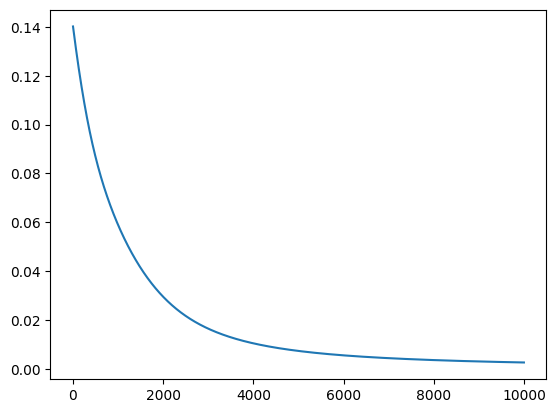

In [42]:
# visualizing the error after each epoch
plt.plot(torch.arange(1,epochs+1).numpy(), torch.Tensor(error_epoch).numpy())

In [43]:
# final output from the model
output

tensor([[0.9399, 0.9344, 0.0873]])

In [44]:
# actual target
y

tensor([[1., 1., 0.]])

In [45]:
# error at last epoch
error

tensor([[0.0018, 0.0021, 0.0038]])